This program calculates the annual changes in transportation emissions data between 2023 and 2024. It reads from an Excel file 'q1totals.xlsx', segregates data by year, and computes the absolute and relative changes for several metrics such as transport kilometers (TKm) and CO2 emissions. The final comparison is saved to a new file 'comparison_file.xlsx'. The input data should include columns for the year, transport mode, service completion month, and various emissions-related figures.


The program requires the input data to be structured as follows for each year (2023 and 2024), with exact column names and types:

'Year' (numeric): The year of the data record.
'Leg Transport Mode' (text): The type of transport, e.g., AIR, ROAD, SEA, BRG (barge), RAIL.
'Service Completion Month' (text): The time period, e.g., total for the year.
'TKm' (numeric): Transport kilometers, the distance over which cargo is transported.
'CO2eq (tonnes)' (numeric): CO2 equivalent emissions in tonnes.
'CO2eq After Reduction' (numeric): CO2 equivalent emissions after reduction efforts in tonnes.
'CO2eq/TKm (g)' (numeric): CO2 equivalent emissions per TKm before reduction.
'CO2eq/TKm (g) After Reduction' (numeric): CO2 equivalent emissions per TKm after reduction.





In [6]:
import pandas as pd

# Replace 'your_file.xlsx' with the path to the Excel file you want to analyze.
file_path = 'q1totals.xlsx'

# Load the Excel file into a pandas DataFrame
data = pd.read_excel(file_path)

# Assume the data is ordered such that the corresponding rows for 2023 and 2024 are aligned
data_2024 = data[data['Year'] == 2024].reset_index(drop=True)
data_2023 = data[data['Year'] == 2023].reset_index(drop=True)

# Initialize a list to store data for the new DataFrame
comparison_rows = []

# Column names to iterate over, excluding 'Year', 'Leg Transport Mode', and 'Service Completion Month'
columns_to_compare = data.columns[3:]

# Iterate over each transport mode and calculate changes
for i in range(len(data_2024)):
    # Initialize the row dictionary with transport mode and service completion month
    row = {
        'Leg Transport Mode': data_2024.at[i, 'Leg Transport Mode'],
        'Service Completion Month': data_2024.at[i, 'Service Completion Month']
    }
    
    # Calculate changes for each column
    for col in columns_to_compare:
        # Calculate the absolute change
        absolute_change = data_2024.at[i, col] - data_2023.at[i, col]
        row[f'{col} Absolute Change'] = absolute_change
        
        # Calculate the relative change
        relative_change = (absolute_change / data_2023.at[i, col] * 100) if data_2023.at[i, col] != 0 else None
        row[f'{col} Relative Change (%)'] = relative_change
    
    # Add the row to the list
    comparison_rows.append(row)

# Convert the list of rows into a DataFrame
comparison_data = pd.DataFrame(comparison_rows)

# Define the output file path
output_path = 'comparison_file.xlsx'

# Save the comparison data to an Excel file
comparison_data.to_excel(output_path, index=False)

print(f"Comparison table created and saved to {output_path}.")


Comparison table created and saved to comparison_file.xlsx.


In [7]:
import pandas as pd

# Placeholder for DataFrame creation - replace with your actual data
# Assuming data_2023 and data_2024 are your DataFrame objects for the years 2023 and 2024 respectively
# For illustration, replace these with the actual DataFrame creation/loading code

# Define measures to analyze
measures = ['TKm', 'CO2eq (tonnes)', 'CO2eq After Reduction', 'CO2eq/TKm (g)', 'CO2eq/TKm (g) After Reduction']

# Initialize an empty DataFrame to hold the comparison data
comparison_df = pd.DataFrame()

# Loop through each measure to calculate the necessary values
for measure in measures:
    comparison_df[f'{measure} 2024'] = data_2024[measure].values  # Values for 2024
    comparison_df[f'{measure} 2023'] = data_2023[measure].values  # Values for 2023
    
    # Calculate the absolute and relative changes
    comparison_df[f'Absolute Change {measure}'] = data_2024[measure].values - data_2023[measure].values
    comparison_df[f'Relative Change {measure} (%)'] = ((data_2024[measure].values - data_2023[measure].values) / data_2023[measure].values)

# Assuming 'Leg Transport Mode' is common for both datasets and unique, set it as index
comparison_df['Leg Transport Mode'] = data_2023['Leg Transport Mode']
comparison_df.set_index('Leg Transport Mode', inplace=True)

# Save the DataFrame to an Excel file
comparison_df.to_excel('Transport_Mode_Comparison.xlsx')

# Print or return the DataFrame for verification if needed
print(comparison_df)


                        TKm 2024      TKm 2023  Absolute Change TKm  \
Leg Transport Mode                                                    
AIR                 4.420343e+08  4.005255e+08         4.150884e+07   
ROAD                5.383641e+08  5.055547e+08         3.280943e+07   
SEA                 1.348303e+10  1.365855e+10        -1.755214e+08   
BRG                 1.511773e+07  5.204635e+06         9.913099e+06   
RAIL                2.436532e+08  1.354320e+08         1.082212e+08   
All modes           1.472220e+10  1.470527e+10         1.693119e+07   

                    Relative Change TKm (%)  CO2eq (tonnes) 2024  \
Leg Transport Mode                                                 
AIR                                0.103636        282375.374675   
ROAD                               0.064898         62901.105316   
SEA                               -0.012851        127143.891837   
BRG                                1.904667           565.727128   
RAIL                   

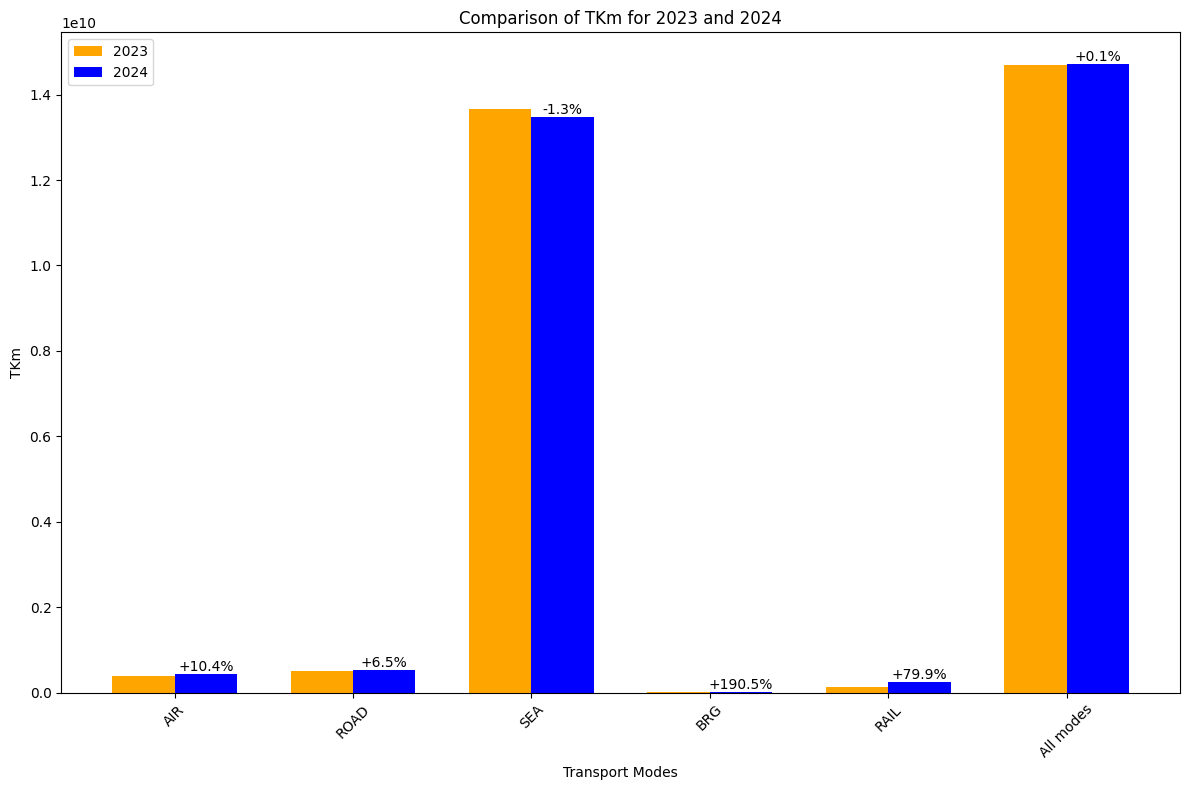

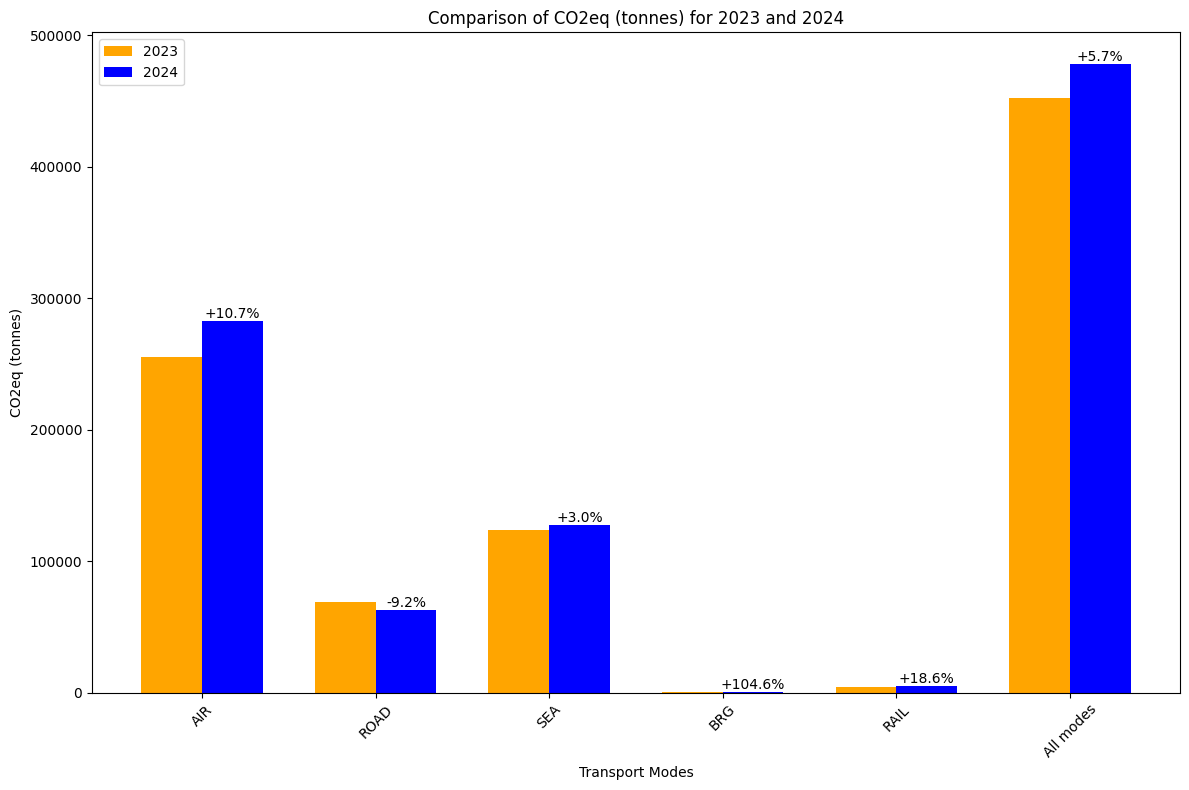

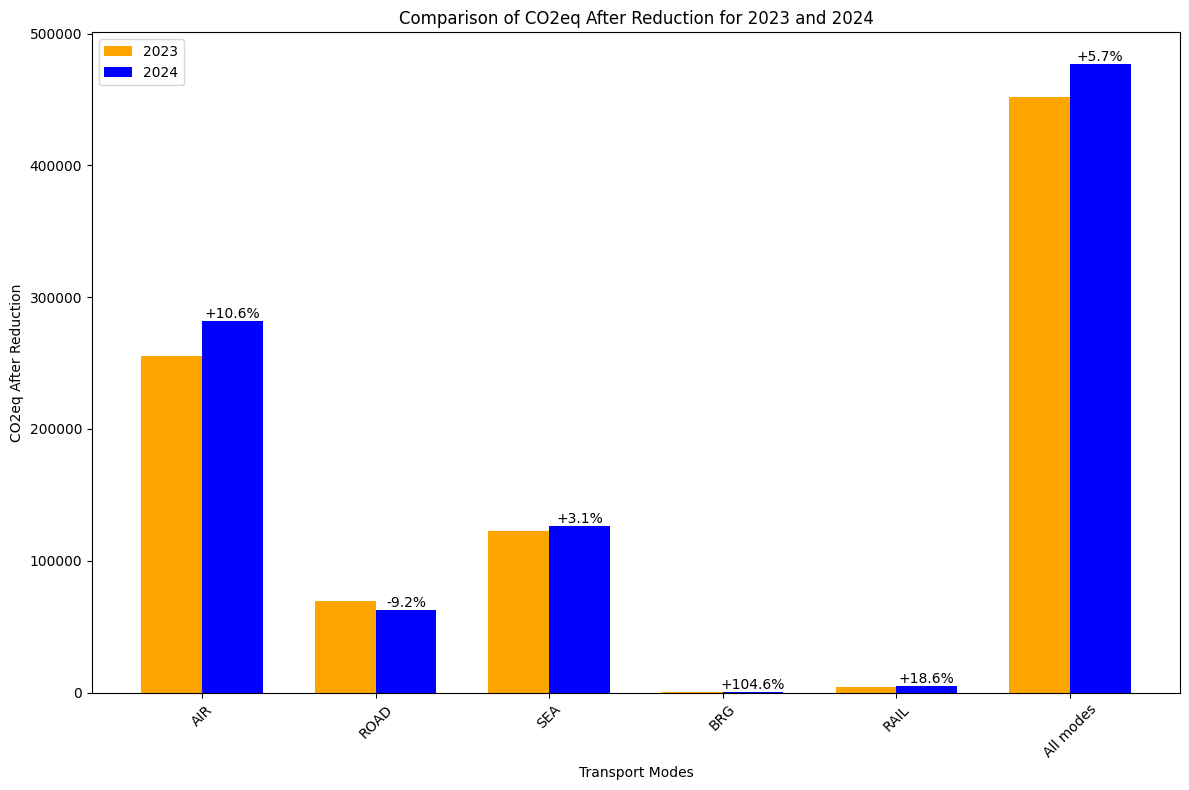

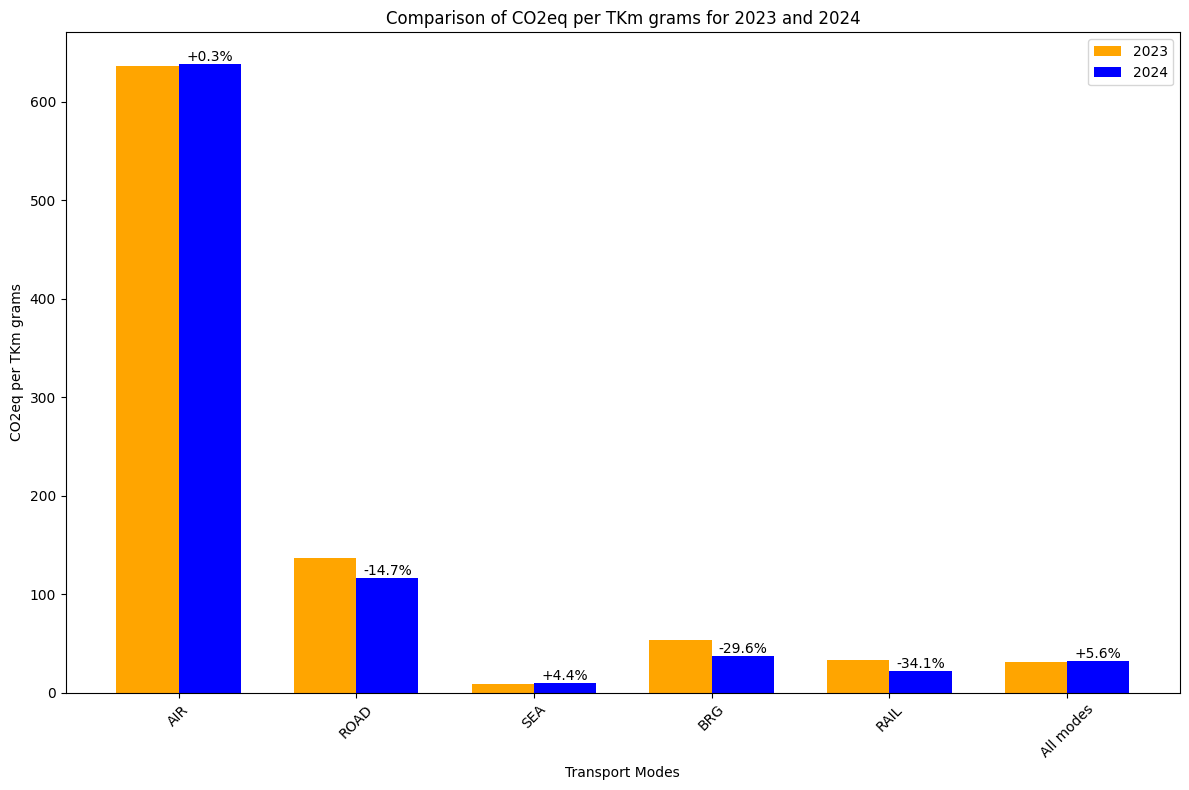

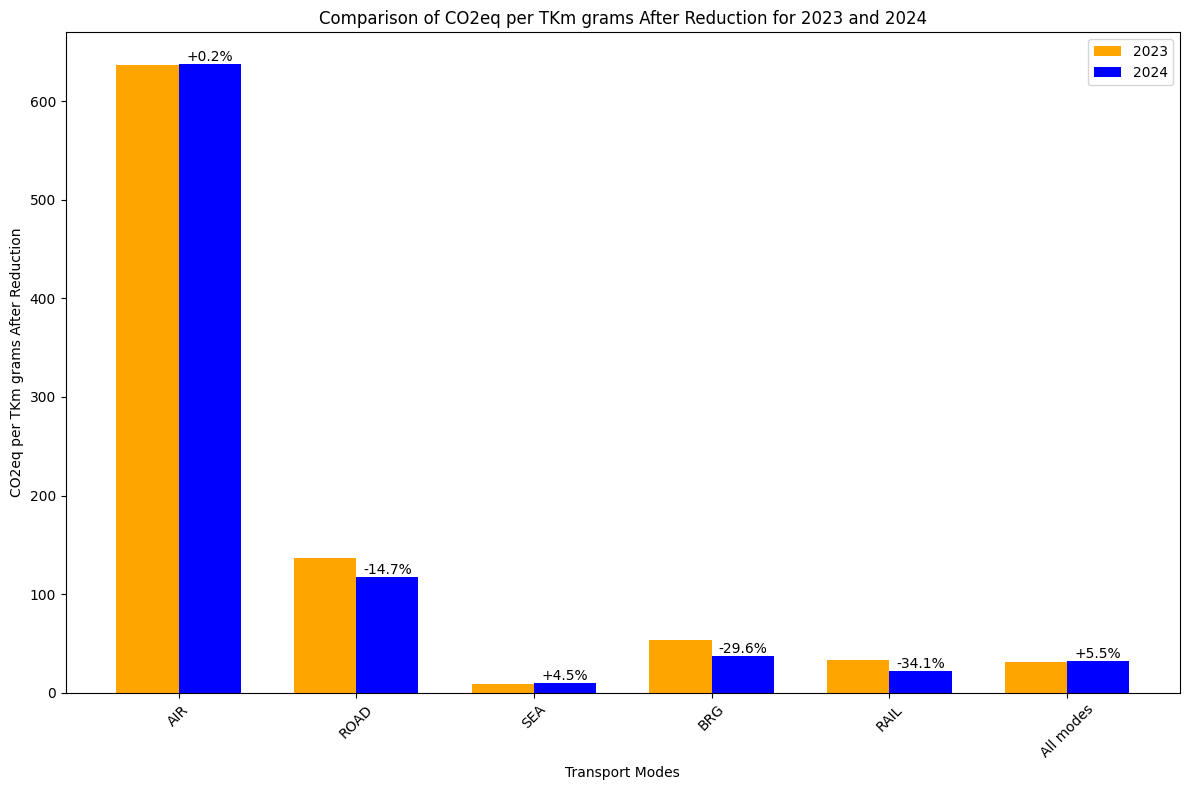

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define measures to plot based on the provided columns
measures = ['TKm', 'CO2eq (tonnes)', 'CO2eq After Reduction', 'CO2eq/TKm (g)', 'CO2eq/TKm (g) After Reduction']

# Loop through each measure and create a bar chart
for measure in measures:
    # Set up the plot
    plt.figure(figsize=(12, 8))

    # Collect the data for both years
    data_2023_measure = data_2023[measure].values
    data_2024_measure = data_2024[measure].values

    # Calculate the percentage difference for 2024 with respect to 2023
    percentage_diff = ((data_2024_measure - data_2023_measure) / data_2023_measure) * 100

    # Define the bar positions on the x-axis
    bar_width = 0.35
    index = np.arange(len(data_2023_measure))

    # Plot both years' data
    plt.bar(index, data_2023_measure, bar_width, label='2023', color='orange')
    bars_2024 = plt.bar(index + bar_width, data_2024_measure, bar_width, label='2024', color='blue')

    # Add some details and labels
    plt.xlabel('Transport Modes')
    plt.ylabel(measure.replace('/', ' per ').replace('(g)', 'grams'))
    plt.title(f'Comparison of {measure.replace("/", " per ").replace("(g)", "grams")} for 2023 and 2024')
    plt.xticks(index + bar_width / 2, data_2023['Leg Transport Mode'], rotation=45)

    # Annotate 2024 bars with the percentage difference
    for bar, diff in zip(bars_2024, percentage_diff):
        height = bar.get_height()
        # Place the text above the bar, adjusting the position based on the bar's height
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{diff:+.1f}%', ha='center', va='bottom')

    plt.legend()

    # Use a valid filename by replacing invalid characters like slashes with underscores
    filename = measure.replace('/', '_').replace(' ', '_').replace('(', '').replace(')', '') + '_comparison_chart.png'

    # Save the plot as an image file
    plt.tight_layout()
    plt.savefig(filename)

    # Show the plot
    plt.show()
